## NBA Player Performance Prediction

### Can we Predict a players average points for a season based on their past performances?

### **Objective**
### 1. Can a players historical statistics be used to predict their future performances?
### 2. What features contribute the most to predicting points?
### 3. Which machine learning models perform best for this type of regression problem?

### *Import Libraries*

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns 

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import r2_score, f1_score, confusion_matrix, classification_report

### *Grab Data*

In [2]:
df = pd.read_csv('2023_stats.csv')
df.head()

,PName,POS,Team,Age,GP,W,L,Min,PTS,FGM,...,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-
0,Jayson Tatum,SF,BOS,25,74,52,22,2732.2,2225,727,...,649,342,213,78,51,160,3691,31,1,470
1,Joel Embiid,C,PHI,29,66,43,23,2284.1,2183,728,...,670,274,226,66,112,205,3706,39,1,424
2,Luka Doncic,PG,DAL,24,66,33,33,2390.5,2138,719,...,569,529,236,90,33,166,3747,36,10,128
3,Shai Gilgeous-Alexander,PG,OKC,24,68,33,35,2416.0,2135,704,...,329,371,192,112,65,192,3425,3,0,149
4,Giannis Antetokounmpo,PF,MIL,28,63,47,16,2023.6,1959,707,...,742,359,246,52,51,197,3451,46,6,341


### *Explore the data*

In [3]:
# checking to see what columns are in this dataset
df.columns

Index(['PName', 'POS', 'Team', 'Age', 'GP', 'W', 'L', 'Min', 'PTS', 'FGM',
       'FGA', 'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB',
       'REB', 'AST', 'TOV', 'STL', 'BLK', 'PF', 'FP', 'DD2', 'TD3', '+/-'],
      dtype='object')

In [4]:
# checking the size of the dataset
df.shape
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns.")

The dataset has 539 rows and 30 columns.


In [5]:
#looking to understand the data and see what trends i can see and identify if the dataset has any outliers
df.describe(include=np.number)

,Age,GP,W,L,Min,PTS,FGM,FGA,FG%,3PM,...,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-
count,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,...,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000
mean,25.970315,48.040816,24.018553,24.022263,1103.617625,523.426716,191.576994,403.005566,46.325232,56.324675,...,198.254174,115.545455,61.300557,33.270872,21.241187,91.181818,1036.938776,4.011132,0.220779,0.000000
std,4.315513,24.650686,14.496366,13.445866,827.765114,498.084360,178.351286,369.595909,10.967271,60.916821,...,181.819962,129.578453,58.279185,28.336745,26.529238,66.206731,894.081896,8.770932,1.564432,148.223909
min,19.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,-642.000000
25%,23.000000,30.500000,12.000000,14.000000,329.000000,120.500000,45.500000,93.500000,41.650000,5.000000,...,50.500000,22.000000,14.500000,8.500000,5.000000,32.000000,254.000000,0.000000,0.000000,-70.000000
50%,25.000000,54.000000,25.000000,25.000000,970.200000,374.000000,138.000000,300.000000,45.500000,36.000000,...,159.000000,69.000000,44.000000,28.000000,13.000000,86.000000,810.000000,0.000000,0.000000,-7.000000
75%,29.000000,68.000000,36.000000,34.000000,1845.900000,769.500000,283.500000,598.500000,50.600000,92.000000,...,286.000000,162.500000,92.500000,51.000000,28.000000,140.000000,1646.000000,3.000000,0.000000,57.000000
max,42.000000,83.000000,57.000000,60.000000,2963.200000,2225.000000,728.000000,1559.000000,100.000000,301.000000,...,973.000000,741.000000,300.000000,128.000000,193.000000,279.000000,3842.000000,65.000000,29.000000,640.000000


In [6]:
#looking to see the data type for each colum
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539 entries, 0 to 538
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PName   539 non-null    object 
 1   POS     534 non-null    object 
 2   Team    539 non-null    object 
 3   Age     539 non-null    int64  
 4   GP      539 non-null    int64  
 5   W       539 non-null    int64  
 6   L       539 non-null    int64  
 7   Min     539 non-null    float64
 8   PTS     539 non-null    int64  
 9   FGM     539 non-null    int64  
 10  FGA     539 non-null    int64  
 11  FG%     539 non-null    float64
 12  3PM     539 non-null    int64  
 13  3PA     539 non-null    int64  
 14  3P%     539 non-null    float64
 15  FTM     539 non-null    int64  
 16  FTA     539 non-null    int64  
 17  FT%     539 non-null    float64
 18  OREB    539 non-null    int64  
 19  DREB    539 non-null    int64  
 20  REB     539 non-null    int64  
 21  AST     539 non-null    int64  
 22  TO

In [7]:
#checking to see if the data has any NAs
df.isna().sum()

PName    0
POS      5
Team     0
Age      0
GP       0
W        0
L        0
Min      0
PTS      0
FGM      0
FGA      0
FG%      0
3PM      0
3PA      0
3P%      0
FTM      0
FTA      0
FT%      0
OREB     0
DREB     0
REB      0
AST      0
TOV      0
STL      0
BLK      0
PF       0
FP       0
DD2      0
TD3      0
+/-      0
dtype: int64

### *Visualize the data*

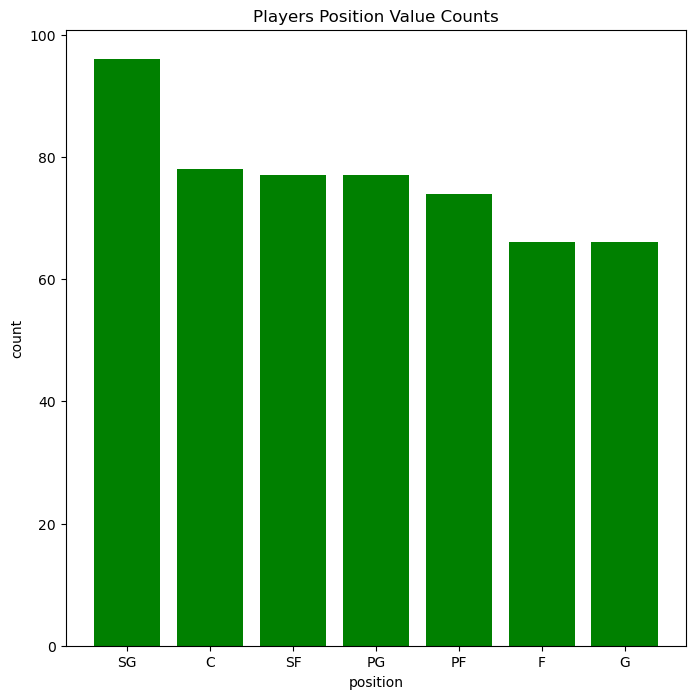

In [8]:
pos_counts = df['POS'].value_counts()

plt.figure(figsize=(8,8))
plt.bar(pos_counts.index,pos_counts.values,color='g')
plt.title("Players Position Value Counts")
plt.ylabel("count")
plt.xlabel('position')

plt.show()



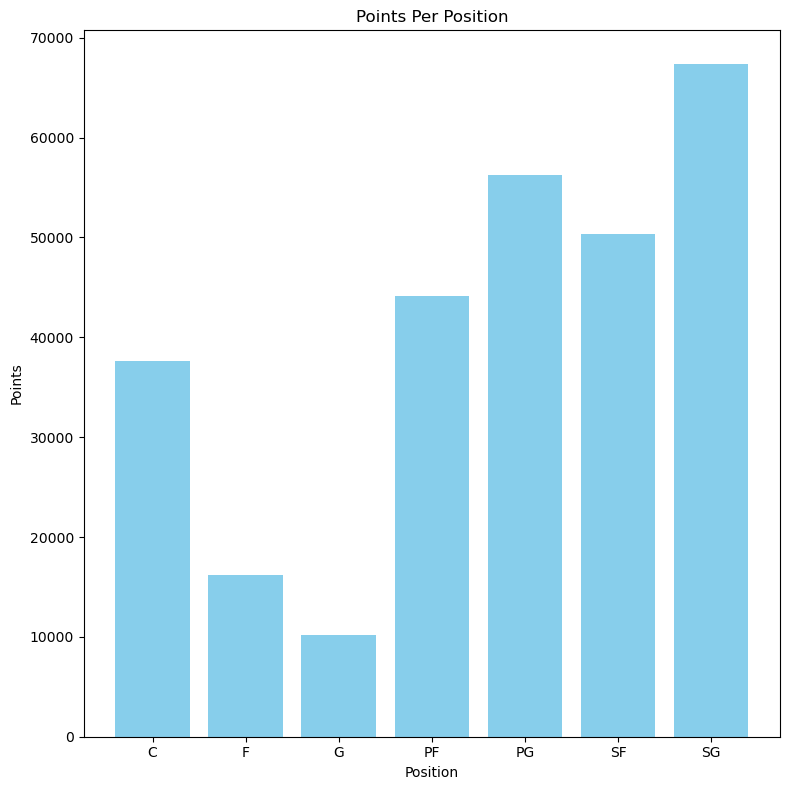

In [9]:
pos_stats = df.groupby('POS')['PTS'].sum().reset_index()

plt.figure(figsize=(8, 8))
plt.bar(pos_stats['POS'], pos_stats['PTS'], color='skyblue')
plt.title("Points Per Position")
plt.ylabel("Points")
plt.xlabel("Position")
plt.tight_layout()
plt.show()


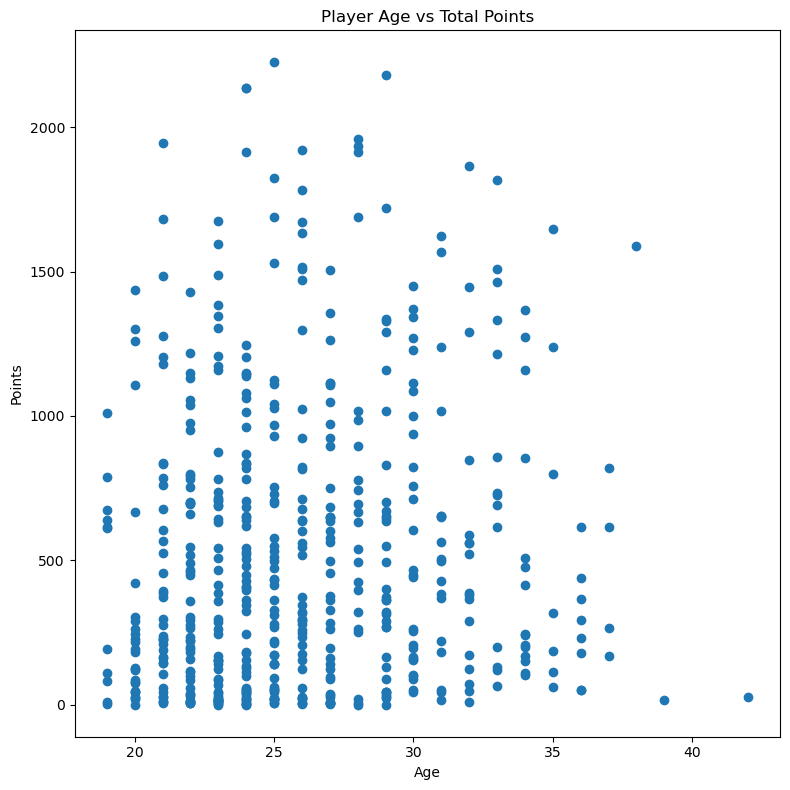

In [10]:
plt.figure(figsize=(8, 8))
plt.scatter(df['Age'], df['PTS'])
plt.title("Player Age vs Total Points")
plt.ylabel("Points")
plt.xlabel("Age")
plt.tight_layout()
plt.show()

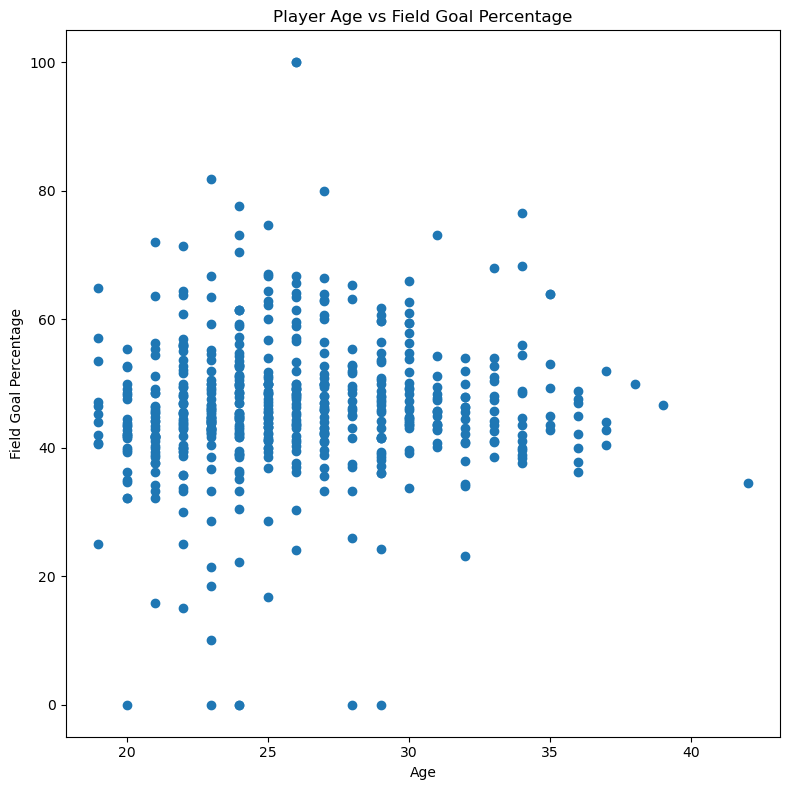

In [11]:
plt.figure(figsize=(8, 8))
plt.scatter(df['Age'], df['FG%'])
plt.title("Player Age vs Field Goal Percentage")
plt.ylabel("Field Goal Percentage")
plt.xlabel("Age")
plt.tight_layout()
plt.show()

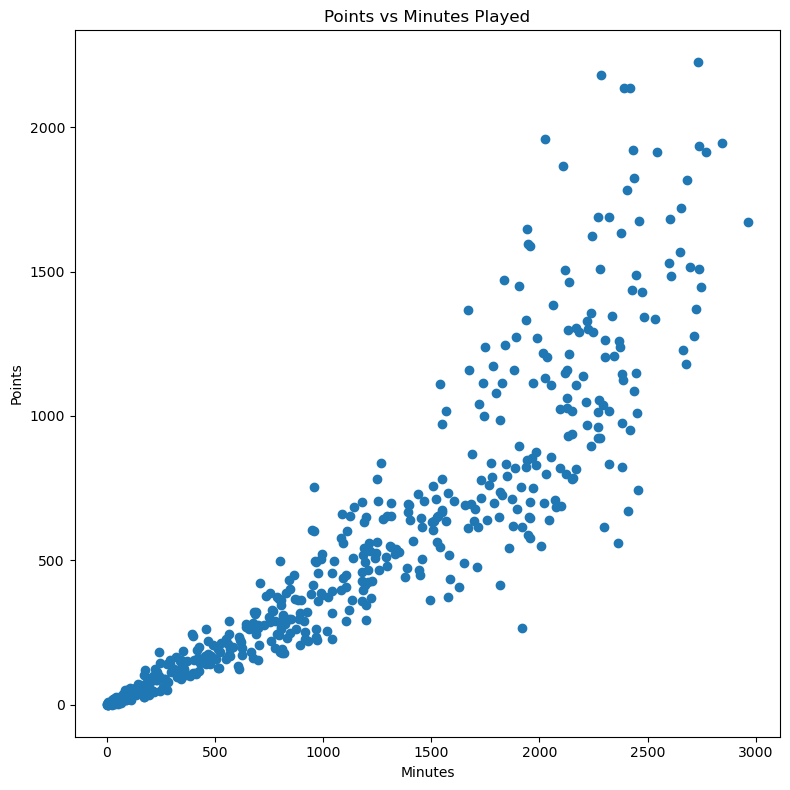

In [12]:
plt.figure(figsize=(8, 8))
plt.scatter(df['Min'], df['PTS'])
plt.title("Points vs Minutes Played")
plt.ylabel("Points")
plt.xlabel("Minutes")
plt.tight_layout()
plt.show()

### *Features Needed For The Model*

In [ ]:
#created a correlation matrix to see which stat is important for predicting points
correlation_matrix = df.corr()

plt.figure(figsize=(8,8))
sns.heatmap(correlation_matrix, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.tight_layout()
plt.show()

### *Features*

In [14]:
#These columns had a high correlation
features = ['Min', 'FGM', 'FGA', 'FG%', '3PM', '3PA', '3P%', 
 'FTM', 'FTA', 'FT%', 'OREB', 'AST', 'PTS', 'DD2', 'TD3', '+/-']

X = df[features]
y = df['PTS']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [15]:
row, col = X_train.shape
print(f"X_train has {row} rows and {col} columns")
row, col = X_test.shape
print(f"X_test has {row} rows and {col} columns")

X_train has 431 rows and 16 columns
X_test has 108 rows and 16 columns


### *Models*

In [17]:
model = LinearRegression()

test_sizes = [0.15, 0.2, 0.25, 0.3]
random_states = [0, 1, 42, 43, 100, 313]

best_test_size = None
best_random_state = None
best_r2_score = -float('inf')

for test_size in test_sizes:
    for random_state in random_states:
        X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=test_size, random_state=random_state)
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        if r2 > best_r2_score:
            best_r2_score = r2
            best_test_size = test_size
            best_random_state = random_state
            
            
print(f"Best test size: {best_test_size}")
print(f"Best random state: {best_random_state}")
print(f"Best R2 score: {best_r2_score}")



Best test size: 0.15
Best random state: 0
Best R2 score: 1.0


In [19]:
model = KNeighborsRegressor()

test_sizes = [0.15, 0.2, 0.25, 0.3]
random_states = [0, 1, 42, 43, 100, 313]

best_test_size = None
best_random_state = None
best_r2_score = -float('inf')

for test_size in test_sizes:
    for random_state in random_states:
        X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=test_size, random_state=random_state)
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        if r2 > best_r2_score:
            best_r2_score = r2
            best_test_size = test_size
            best_random_state = random_state
            
            
print(f"Best test size: {best_test_size}")
print(f"Best random state: {best_random_state}")
print(f"Best R2 score: {best_r2_score}")

Best test size: 0.2
Best random state: 313
Best R2 score: 0.994869173842119


In [20]:
model = DecisionTreeRegressor()

test_sizes = [0.15, 0.2, 0.25, 0.3]
random_states = [0, 1, 42, 43, 100, 313]

best_test_size = None
best_random_state = None
best_r2_score = -float('inf')

for test_size in test_sizes:
    for random_state in random_states:
        X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=test_size, random_state=random_state)
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        if r2 > best_r2_score:
            best_r2_score = r2
            best_test_size = test_size
            best_random_state = random_state
            
            
print(f"Best test size: {best_test_size}")
print(f"Best random state: {best_random_state}")
print(f"Best R2 score: {best_r2_score}")

Best test size: 0.15
Best random state: 1
Best R2 score: 0.9997083850990366
